# Keyword and Phrase tagging
   <font size="4">With this task we will extract keywords and Phrase with contextual and semantic relations</font> 

## Data 
[1.Data Extraction](#1.Data_Extraction)

<font size="4"> 
    Here 2k Patent Records from Patbase has been used 
</font>

## Trained and Pre-trained Embedding Model overview and Usage

### Embedding  

<font size="3">    
      1. BioWordVec Trained
      2. BioWordVec Pre-trained
      3. Glove
</font>


### Model

<font size="4"> 
      1. Sentence Transformers
      2. BlueBERT
</font>


## Preprocessing 

1. Remove tags
2. Lemmatizer



## Keywords Tagging 


### Keywords Extraction

<font size="4">     
1) Count Vectorizer \
2) TFIDF
</font>


### Remove Redudant Keywords
<font size="4">     
       Maximal Margin Relevancy
</font>


## Library
1) gensim
2) spacy
3) nltk






In [2]:
import string
import re
import numpy as np
import pandas as pd
import codecs
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from scipy import spatial


import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer, pos_tag, word_tokenize



from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from scipy import stats

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


import tqdm

# doc=nlp(text)
stop_words=stopwords.words('english')
from gensim.summarization import keywords
lemmatizer = WordNetLemmatizer()
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

## 1.Data_Extraction

In [6]:
pat_data=pd.read_csv('patbase_bib_csv200020210716_.csv')
abs_text=pat_data['Abstract']
print(type(abs_text))

<class 'pandas.core.series.Series'>


## Preprocessing 

In [3]:
def text_cleaning(text):
    cleaned_txt = re.sub('<[^<]+>', '', str(text))
    cleaned_txt = re.sub( r'\[.*?\]', '',cleaned_txt)  #remove brackets
    cleaned_txt = re.sub('\d+', '', cleaned_txt)
    cleaned_txt = re.sub('\(\w+\)', '', cleaned_txt)
    cleaned_txt=cleaned_txt.translate(str.maketrans('', '',string.punctuation)) 
    return cleaned_txt
   
def stopword_removal(text):
    cleaned_txt = ' '.join([token for token in word_tokenize(text) if token not in stop_words])
    return cleaned_txt
def lemmatize_text(text):
    cleaned_txt=' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(text)])
    return cleaned_txt

def preprocessed_text(df):
    
    col=['nltk_tokens','nouns','lemmatize_text']
    preprocess_txt=pd.DataFrame(columns=col)
    abs_clean_text=df.apply(text_cleaning)
    
    stopword_removed_text=abs_clean_text.apply(stopword_removal)         
    preprocess_txt['lemmatize_text']=stopword_removed_text.apply(lemmatize_text)
  
    for ind,text in preprocess_txt['lemmatize_text'].iteritems():       
        tokens=word_tokenize(text)
        pos_tokens=nltk.pos_tag(tokens)
        preprocess_txt.at[ind,'nouns']=[pos_token for pos_token,pos in pos_tokens if pos.startswith('N')]
        preprocess_txt.at[ind,'nltk_tokens']=tokens     
    return preprocess_txt


In [7]:
preprocessed_df=preprocessed_text(abs_text)
preprocessed_df

,nltk_tokens,nouns,lemmatize_text
0,"[The, purpose, present, invention, provide, re...","[invention, resin, balance, variety, property,...",The purpose present invention provide resin ex...
1,"[A, battery, pack, including, least, one, batt...","[battery, pack, battery, cell, pack, case, bat...",A battery pack including least one battery cel...
2,"[A, quaternary, ammonium, compound, reaction, ...","[ammonium, compound, reaction, product, amine,...",A quaternary ammonium compound reaction produc...
3,"[A, washing, machine, comprises, outer, tub, i...","[machine, comprises, inner, tub, mean, rotor, ...",A washing machine comprises outer tub inner tu...
4,"[The, present, invention, relates, ceiling, ty...","[invention, ceiling, type, air, conditioner, h...",The present invention relates ceiling type air...
...,...,...,...
1995,"[A, control, method, includes, establishing, c...","[control, method, connection, device, device, ...",A control method includes establishing connect...
1996,"[A, numerical, controller, capable, determinin...","[controller, input, value, operator, range, li...",A numerical controller capable determining whe...
1997,"[A, magnetic, resonance, apparatus, provided, ...","[resonance, apparatus, resonance, apparatus, p...",A magnetic resonance apparatus provided The ma...
1998,"[A, fluidconveying, device, conveying, fluid, ...","[device, tank, pump, swirl, pot, pump, drive, ...",A fluidconveying device conveying fluid tank i...


In [ ]:

## Testing

###########nltk########################


#######################################Steps to convert : Document->Sentences->Tokens->POS->Lemmas

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


class text_tokenizer(object):
    """
    split the document into sentences and tokenize each sentence
    """
    def __init__(self):
        self.splitter  =  nltk.WordPunctTokenizer()
        self.tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self,text):
        # split into single sentence
        sentences = self.splitter.tokenize(text)
        # tokenization in each sentences
        tokens = [self.tokenizer.tokenize(sent) for sent in sentences]
        return tokens

class text_cleaner(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        
    def stopword_removal(self,text):
        cleaned_txt = ' '.join([token for token in word_tokenize(token) if token not in stop_words])
    def lemmatize_tokens(self,text):
        cleaned_txt=' '.join([self.lemmatizer.lemmatize(token) for token in word_tokenize(text)])



class LemmatizationWithPOSTagger(object):
    def __init__(self):
        pass
    def get_wordnet_pos(self,treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def pos_tag(self,tokens):
        # find the pos tagginf for each tokens [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
        pos_tokens = [nltk.pos_tag(token) for token in tokens]

        # lemmatization using pos tagg   
        # convert into feature set of [('What', 'What', ['WP']), ('can', 'can', ['MD']), ... ie [original WORD, Lemmatized word, POS tag]
        pos_tokens = [[(word, lemmatizer.lemmatize(word,self.get_wordnet_pos(pos_tag)), [pos_tag]) for (word,pos_tag) in pos] for pos in pos_tokens]
        return pos_tokens

    
lemmatizer = WordNetLemmatizer()
text_tokenizer = text_tokenizer()
lemmatization_using_pos_tagger = LemmatizationWithPOSTagger()

#step 1 split document into sentence followed by tokenization
tokens = text_tokenizer.split(text)

#step 2 lemmatization using pos tagger 
lemma_pos_token = lemmatization_using_pos_tagger.pos_tag(tokens)
print(lemma_pos_token)



# #####Text blob############    
# from textblob import TextBlob

# sent = TextBlob(sentence)
# " ". join([w.lemmatize() for w in sent.words])

# ##########################

# def lemmatize_with_postag(sentence):
#     sent = TextBlob(sentence)
#     tag_dict = {"J": 'a', 
#                 "N": 'n', 
#                 "V": 'v', 
#                 "R": 'r'}
#     words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
#     lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
#     return " ".join(lemmatized_list)


## Keyword Extractor Library Based Approach

In [ ]:
def gensim_keyword_extractor(text):
    """Here text as input keywords is module from gensim.summarization """
    print(keywords(text,words = 8))

doc0=abs_clean_text[0]
gensim_keyword_extractor(doc0)

In [ ]:
def spacy_keyword_extractor(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    print(doc)
    nouns = set()
#     noun_phrases = set(chunk.text.strip().lower() for chunk in doc.noun_chunks)
    for token in doc:
        if token.pos_ == "NOUN":
            nouns.add(token.text)
#     all_nouns = nouns.union(noun_phrases)
#     print(nouns)
    return list(nouns)
#     print(all_nouns)

#     candidates = list(filter(lambda candidate: candidate in all_nouns, all_candidates))
#     return candidates[:20]
spacy_keyword_extractor(doc0)

## Pretrained Embeddings and Model
### 1) BiowordVec Trained and Pretrained
### 2) Glove
### 3) Sentence Transformer
### 4) BlueBERT Model 


## BiowordVec Trained


In [5]:
vec_path='pubmed_mesh_test.wv.vectors_ngrams.npy'
bin_path='pubmed_mesh_test.bin'
test_path='pubmed_mesh_test'
word_model=KeyedVectors.load_word2vec_format(bin_path,binary=True)
# test_model=KeyedVectors.load_word2vec_format(test_path)

In [65]:
disambiguation_words=['patients','patient']
most_similar_patients=word_model.most_similar('patients',topn=10)
most_similar_patient=word_model.most_similar('patient',topn=10)
print('patients:',most_similar_patients,'\n','patient:',most_similar_patient)

# stats.zscore(most_similar_patients)

patients: [('nonpatients', 0.8853691220283508), ('inpatients', 0.8622636198997498), ('patient', 0.8075956106185913), ('whom', 0.7961167693138123), ('subjects', 0.7958483695983887), ('outpatients', 0.7919209599494934), ('children', 0.7650102376937866), ('cases', 0.7648932337760925), ('individuals', 0.733061671257019), ('who', 0.7279455661773682)] 
 patient: [('inpatient', 0.8259785771369934), ('patients', 0.8075956106185913), ('whom', 0.7504878044128418), ('outpatient', 0.7308553457260132), ('nonpatients', 0.7290786504745483), ('boy', 0.7279731035232544), ('case', 0.7218676805496216), ('inpatients', 0.7181251645088196), ('who', 0.7089853286743164), ('withheld', 0.7009677290916443)]


In [306]:
most_similar_patients=word_model.most_similar_cosmul(['blood','pressure'],topn=10)
print('Blood Pressure:\n',most_similar_patients)
print('glycogen:\n',word_model.most_similar('glycogen',topn=10))
# print(word_model.most_similar('glycosidic'))

# word_model.most_similar('n-acetylneuraminic')
# list=word_model.most_similar_cosmul(['eye','diabetes'])
# word_model.most_similar_cosmul(['cancer','lung'])
# word_model.most_similar_cosmul(['organ','ligament'])

Blood Pressure:
 [('rcbf', 0.782541036605835), ('pressures', 0.7733681201934814), ('rbf', 0.7583125829696655), ('cbf', 0.7578179240226746), ('bloodflow', 0.7540532350540161), ('flow', 0.7476402521133423), ('mbf', 0.7328212261199951), ('pressurized', 0.731748104095459), ('arterial', 0.7188305854797363), ('low-pressure', 0.715316116809845)]
glycogen:
 [('glycogenic', 0.8793429136276245), ('glycogenolysis', 0.8574715852737427), ('glycogenolytic', 0.8442074060440063), ('glycogenosis', 0.8203446865081787), ('glycogenesis', 0.7889986634254456), ('glycogen-depletion', 0.774672269821167), ('glycogen-phosphorylase', 0.758968710899353), ('glucan', 0.7334698438644409), ('hexose', 0.7278242111206055), ('glucose', 0.723128080368042)]


In [310]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
# display_pca_scatterplot(word_model,['glycosidic','n-acetylneuraminic','patients','glycogen'])

## BiowordVec Pretrained
### Intrinsic task 


In [ ]:
# # !pip install sent2vec
# import sent2vec
import math
path='/ML_projects/NLP_pipeline/pretrain_model/bio_embedding_intrinsic.bin'
Bioword_intrinsic_model=KeyedVectors.load_word2vec_format(path,binary=True)
Bioword_intrinsic_model.word_vec('deltaproteobacterial')

In [311]:

def get_dist(word1, word2):
    print(word1, word2)
    v1 = Bioword_intrinsic_model.get_vector(word1)
    v2 = Bioword_intrinsic_model.get_vector(word2)
    err = ((v1 - v2) ** 2).sum()
    return math.sqrt(err)


print(get_dist('biomedical', 'medical'))
print(get_dist('biomedical', 'biological'))
print(get_dist('biomedical', 'biomechanical'))

biomedical medical
3.2407716164303895
biomedical biological
2.9746289318341024
biomedical biomechanical
4.23327487294439


## Glove

In [155]:

embeddings_dict = {}
with open("V:/ML_projects/pretrain_vectors/glove.6B.100d.txt", 'r',encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

# find_closest_embeddings(embeddings_dict["acetyl"])

# Sentence Transformer

https://www.sbert.net/ \
https://www.sbert.net/examples/applications/paraphrase-mining/README.html

In [55]:
# !pip install -U sentence-transformers

In [9]:
import numpy as np
import itertools
from sklearn.metrics.pairwise import cosine_similarity
from typing import List, Tuple
import nltk
from nltk.corpus import stopwords
# from nltk.tokenize import sentence
from sklearn.feature_extraction.text import TfidfVectorizer


from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("paraphrase-MiniLM-L6-v2")


## Keyword Extraction And Redundant Keywords Removal

### Maximal Margin Relevancy

In [10]:
def mmr(doc_embedding: np.ndarray,word_embeddings: np.ndarray,words,top_n,diversity):
    # Extract similarity within words, and between words and the document
    word_doc_similarity = cosine_similarity(word_embeddings, doc_embedding)
    word_similarity = cosine_similarity(word_embeddings)
    
    # Initialize candidates and already choose best keyword/keyphras
    keywords_idx = [np.argmax(word_doc_similarity)]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]
    
    for _ in range(top_n - 1):
        # Extract similarities within candidates and
        # between candidates and selected keywords/phrases
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # Calculate MMR
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # Update keywords & candidates
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)
            
    return [(words[idx], round((word_doc_similarity.reshape(1, -1)[0][idx]), 4)) for idx in keywords_idx]

### Count Vectorizer and MMR 

In [53]:
doc=abs_clean_text[0]
print(doc)

count = CountVectorizer(ngram_range=(1,1), stop_words=stop_words, min_df=1).fit([doc])
words = count.get_feature_names()
print(words)
top_n:int=10
diversity:0.8
    
    
doc_embedding=embedding_model.encode([doc])
word_embedding=embedding_model.encode(words)
keywords = mmr(doc_embedding, word_embedding, words,top_n,diversity)
print(keywords)

The purpose of the present invention is to provide a resin that has an excellent balance of a variety of properties, such as optical physical properties, heat resistance, mechanical properties, and heat stability, and to provide an optical film and a phase-difference film that are obtained using the resin. The present invention relates to a polycondensation resin that has a repeating structural unit that includes an aromatic structure, the resin being characterized by having a structural unit and by the content of the aromatic structure in the repeating structural unit satisfying formula (I). (I) 5 less than or equal to A less than or equal to -22.5·B+38.3, wherein 0.75 less than or equal to B less than or equal to 0.93, A is the content (in mass percent) of the aromatic structure in the repeating structural unit that constitutes the resin, and B is the ratio (R450/R550) of the phase difference (R450) at 450 nm and the phase difference (R550) at 550 nm of a stretched film that is produ

## COVID Abstracts


In [319]:
list_of_doc=['Impact of COVID-19 on Lung Allograft and Clinical Outcomes in Lung Transplant Recipients: A Case-Control Study.','Integrated analysis of multimodal single-cell data.','SARS-Cov-2 viral and serological screening of staff in 31 European fertility units.','Impact of COVID-19 on cancer care in India: a cohort study.','SARS-CoV-2 vaccines for all but a single dose for COVID-19 survivors.','Associations of baseline use of biologic or targeted synthetic DMARDs with COVID-19 severity in rheumatoid arthritis: Results from the COVID-19 Global Rheumatology Alliance physician registry.','COVID-19 Vaccine Acceptance Among Pregnant, Breastfeeding and Non-pregnant Reproductive Aged Women.','Changes in the incidence of invasive disease due to Streptococcus pneumoniae, Haemophilus influenzae, and Neisseria meningitidis during the COVID-19 pandemic in 26 countries and territories in the Invasive Respiratory Infection Surveillance Initiative: a prospective analysis of surveillance data.','Seroprevalence of SARS-CoV-2 antibodies in Seattle, Washington: October 2019-April 2020.','Cancer and SARS-CoV-2 Infection: A Third-Level Hospital Experience.','Differential association between inflammatory cytokines and multiorgan dysfunction in COVID-19 patients with obesity.','Urgent needs to accelerate the race for COVID-19 therapeutics.','Management of IBD Patients During the COVID-19 Pandemic.','Rapid disappearance of influenza following the implementation of COVID-19 mitigation measures in Hamilton, Ontario.','A novel strategy for SARS-CoV-2 mass screening with quantitative antigen testing of saliva: a diagnostic accuracy study.','COMMUNITY-BASED PREVALENCE ESTIMATES OF CHLAMYDIA TRACHOMATIS AND NEISSERIA GONORRHOEAE INFECTIONS AMONG GAY, BISEXUAL AND OTHER MEN WHO HAVE SEX WITH MEN IN MONTRÃ‰AL, CANADA.','Factors indicating intention to vaccinate with a COVID-19 vaccine among older U.S. adults.']
doc1=''.join([i for i in list_of_doc])
# print(doc1)

stop_words=stopwords.words('english')
count = CountVectorizer(ngram_range=(1,1),tokenizer=word_tokenize,stop_words=stop_words, min_df=1).fit([doc1])
words = count.get_feature_names()
print(words)


top_n:int=10
diversity:0.8
doc_embedding=embedding_model.encode([doc1])
# print(doc_embedding)
word_embedding=embedding_model.encode(words)
keywords = mmr(doc_embedding, word_embedding, words,top_n,diversity)
print(keywords)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[',', '.', '2019-april', '2020.cancer', '26', '31', ':', 'accelerate', 'acceptance', 'accuracy', 'adults', 'aged', 'alliance', 'allograft', 'among', 'analysis', 'antibodies', 'antigen', 'arthritis', 'association', 'baseline', 'biologic', 'bisexual', 'breastfeeding', 'canada.factors', 'cancer', 'care', 'case-control', 'chlamydia', 'clinical', 'cohort', 'countries', 'covid-19', 'cytokines', 'data.sars-cov-2', 'data.seroprevalence', 'diagnostic', 'disappearance', 'disease', 'dmards', 'dose', 'due', 'dysfunction', 'estimates', 'european', 'experience.differential', 'fertility', 'following', 'gay', 'global', 'gonorrhoeae', 'haemophilus', 'hamilton', 'hospital', 'ibd', 'impact', 'implementation', 'incidence', 'india', 'indicating', 'infection', 'infections', 'inflammatory', 'influenza', 'influenzae', 'initiative', 'intention', 'invasive', 'lung', 'mass', 'measures', 'men', 'meningitidis', 'mitigation', 'montrã‰al', 'multimodal', 'multiorgan', 'needs', 'neisseria', 'non-pregnant', 'novel', 'o

### TFIDF and MMR


In [32]:
doc=abs_clean_text[0]
# print(doc)
stop_words=stopwords.words('english')
count = TfidfVectorizer(ngram_range=(1,2), tokenizer=word_tokenize,stop_words=stop_words, min_df=1).fit([doc])
tf_idf_words = count.get_feature_names()
# print(tf_idf_words)
top_n:int=10
diversity:0.8
doc_embedding=embedding_model.encode([doc])
# print(doc_embedding)
word_embedding=embedding_model.encode(tf_idf_words)
keywords = mmr(doc_embedding, word_embedding,tf_idf_words,top_n,diversity)
print(keywords)


# print(doc1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[('constitutes resin', 0.5967), ('balance', 0.132), ('nm phase', 0.1443), ('polycondensation', 0.337), ('film', 0.2241), ('heat resistance', 0.2212), ('unit includes', 0.2223), ('purpose present', 0.322), ('variety properties', 0.2898), ('provide optical', 0.2177)]


In [38]:
list_of_doc=['Impact of COVID-19 on Lung Allograft and Clinical Outcomes in Lung Transplant Recipients: A Case-Control Study.','Integrated analysis of multimodal single-cell data.','SARS-Cov-2 viral and serological screening of staff in 31 European fertility units.','Impact of COVID-19 on cancer care in India: a cohort study.','SARS-CoV-2 vaccines for all but a single dose for COVID-19 survivors.','Associations of baseline use of biologic or targeted synthetic DMARDs with COVID-19 severity in rheumatoid arthritis: Results from the COVID-19 Global Rheumatology Alliance physician registry.','COVID-19 Vaccine Acceptance Among Pregnant, Breastfeeding and Non-pregnant Reproductive Aged Women.','Changes in the incidence of invasive disease due to Streptococcus pneumoniae, Haemophilus influenzae, and Neisseria meningitidis during the COVID-19 pandemic in 26 countries and territories in the Invasive Respiratory Infection Surveillance Initiative: a prospective analysis of surveillance data.','Seroprevalence of SARS-CoV-2 antibodies in Seattle, Washington: October 2019-April 2020.','Cancer and SARS-CoV-2 Infection: A Third-Level Hospital Experience.','Differential association between inflammatory cytokines and multiorgan dysfunction in COVID-19 patients with obesity.','Urgent needs to accelerate the race for COVID-19 therapeutics.','Management of IBD Patients During the COVID-19 Pandemic.','Rapid disappearance of influenza following the implementation of COVID-19 mitigation measures in Hamilton, Ontario.','A novel strategy for SARS-CoV-2 mass screening with quantitative antigen testing of saliva: a diagnostic accuracy study.','COMMUNITY-BASED PREVALENCE ESTIMATES OF CHLAMYDIA TRACHOMATIS AND NEISSERIA GONORRHOEAE INFECTIONS AMONG GAY, BISEXUAL AND OTHER MEN WHO HAVE SEX WITH MEN IN MONTRÃ‰AL, CANADA.','Factors indicating intention to vaccinate with a COVID-19 vaccine among older U.S. adults.']
doc1=''.join([i for i in list_of_doc])


stop_words=stopwords.words('english')
tfidf_count = TfidfVectorizer(ngram_range=(1,1), tokenizer=word_tokenize,stop_words=stop_words, min_df=1).fit([doc1])
tf_idf_words1 = tfidf_count.get_feature_names()

top_n:int=10
diversity=0.8
doc_embedding1=embedding_model.encode([doc1])
word_embedding1=embedding_model.encode(tf_idf_words1)


keywords = mmr(doc_embedding1, word_embedding1,tf_idf_words1,top_n,diversity)

print(tf_idf_words1)

print(keywords)


[',', '.', '2019-april', '2020.cancer', '26', '31', ':', 'accelerate', 'acceptance', 'accuracy', 'adults', 'aged', 'alliance', 'allograft', 'among', 'analysis', 'antibodies', 'antigen', 'arthritis', 'association', 'baseline', 'biologic', 'bisexual', 'breastfeeding', 'canada.factors', 'cancer', 'care', 'case-control', 'chlamydia', 'clinical', 'cohort', 'countries', 'covid-19', 'cytokines', 'data.sars-cov-2', 'data.seroprevalence', 'diagnostic', 'disappearance', 'disease', 'dmards', 'dose', 'due', 'dysfunction', 'estimates', 'european', 'experience.differential', 'fertility', 'following', 'gay', 'global', 'gonorrhoeae', 'haemophilus', 'hamilton', 'hospital', 'ibd', 'impact', 'implementation', 'incidence', 'india', 'indicating', 'infection', 'infections', 'inflammatory', 'influenza', 'influenzae', 'initiative', 'intention', 'invasive', 'lung', 'mass', 'measures', 'men', 'meningitidis', 'mitigation', 'montrã‰al', 'multimodal', 'multiorgan', 'needs', 'neisseria', 'non-pregnant', 'novel', 'o

# 2k Patent Abstract 

In [133]:
docs=preprocessed_df['lemmatize_text']
print(docs)
Nouns_docs=pre_pat_abs_df['nouns'].apply(lambda x:' '.join(x))


0       The purpose present invention provide resin ex...
1       A battery pack including least one battery cel...
2       A quaternary ammonium compound reaction produc...
3       A washing machine comprises outer tub inner tu...
4       The present invention relates ceiling type air...
                              ...                        
1995    A control method includes establishing connect...
1996    A numerical controller capable determining whe...
1997    A magnetic resonance apparatus provided The ma...
1998    A fluidconveying device conveying fluid tank i...
1999    The present disclosure provides method treatin...
Name: lemmatize_text, Length: 2000, dtype: object


In [128]:
Nouns_docs

0       invention resin ha balance variety property pr...
1       battery pack battery cell pack case battery ce...
2       ammonium compound reaction product amine weigh...
3       machine comprises inner tub mean rotor stator ...
4       invention ceiling type air conditioner harness...
                              ...                        
1995    control method connection device device connec...
1996    controller input value operator range limit va...
1997    resonance apparatus resonance apparatus proces...
1998    device tank pump swirl pot pump drive region r...
1999      disclosure wound method compound inhibits VEGFB
Name: nouns, Length: 2000, dtype: object

## TF-IDF

In [121]:
# count = TfidfVectorizer(ngram_range=(1,1), tokenizer=word_tokenize,stop_words=stop_words, min_df=1).fit(docs)
# tf_idf_words = count.get_feature_names()
# print(len(tf_idf_words))
# lemmatize_tfidf_tokens=[]
# for i in tf_idf_words:  
#     lemmatize_tfidf_tokens.append(lemmatizer.lemmatize(i))
# print(len(lemmatize_tfidf_tokens))

# unique_tfidf_tokens=set(lemmatize_tfidf_tokens)
# print(len(unique_tfidf_tokens))

# pos_tokens=nltk.pos_tag(unique_tfidf_tokens)
# Noun_tfidf_tokens=[pos_token for pos_token,pos in pos_tokens if pos.startswith('N')]
# len(Noun_tfidf_tokens)

# doc_embedding=embedding_model.encode(docs)
# word_embedding=embedding_model.encode(Noun_tfidf_tokens)
# df=count.transform(Noun_tfidf_tokens)
# top_n:int=10
# diversity:0.8
# import tqdm
# docs=pre_pat_abs_df['nltk_lematize']
# keywords=[]
# for index, doc in enumerate(docs):
#             doc_words = [Noun_tfidf_tokens[i] for i in df[index].nonzero()[1]]
#             if doc_words:
#                 doc_word_embeddings = np.array([word_embeddings[i] for i in df[index].nonzero()[1]])
#                 distances = cosine_similarity([doc_embeddings[index]], doc_word_embeddings)[0]
#                 doc_keywords = [(doc_words[i], round(float(distances[i]), 4)) for i in distances.argsort()[-top_n:]]
#                 keywords.append(doc_keywords)
# print(keywords)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


13195


## Count Vectorizer and MMR 

In [129]:
countvec = CountVectorizer(ngram_range=(1,1), stop_words=stop_words, min_df=1).fit(docs)
words = countvec.get_feature_names()
df = countvec.transform(docs)
cv_doc_embeddings = embedding_model.encode(docs)
cv_word_embeddings =embedding_model.encode(words)

In [130]:
top_n:int=10
diversity:0.8
phrases=[]
docs=pre_pat_abs_df['nltk_lematize']
keywords=[]
for index, doc in enumerate(docs):
            doc_words = [words[i] for i in df[index].nonzero()[1]]
            if doc_words:
                doc_word_embeddings = np.array([cv_word_embeddings[i] for i in df[index].nonzero()[1]])
                distances = cosine_similarity([cv_doc_embeddings[index]], doc_word_embeddings)[0]
                doc_keywords = [(doc_words[i], round(float(distances[i]), 4)) for i in distances.argsort()[-top_n:]]
                keywords.append(doc_keywords)
# print(keywords)
for keyword in keywords:
    phrase=' '.join([key[0] for key in keyword])
    phrases.append(phrase)    
phrases


['resistance invention structure phase polycondensation property mechanical aromatic structural resin',
 'outer temperature unit closing hole flow meter pack cooling battery',
 'substituted atom molecular ammonium alkylating reaction compound carbon acidactivated amine',
 'dehydration rotate stator driving drive pulsator rotor tub washing machine',
 'unit connected invention lifted lifting air attached device harness ceiling',
 'supply battery separate separation air disposed motor suction dust cleaner',
 'fluid comprises control start pipe driving assembly cylinder piston invention',
 'pressurized plasticizing plasticization molten starvation thermoplastic molding starved foaming foammolded',
 'optically film interface gate photoresponsive device charge electrode insulation semiconductor',
 'retaining direction rod fluid floating tube piston guide slider cylinder',
 'detects inclination controller detecting control angle sensor motorized wheel wheelchair',
 'nacetyllcysteine food prec

# Visualization

In [15]:
# !pip install kmapper
import kmapper as km

In [17]:
# Project all of the "sentences" down into a 2D representation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler


from sklearn import cluster


mapper = km.KeplerMapper(verbose=2)
projected_X = mapper.fit_transform(np.array(phrases),
projection=[TfidfVectorizer(analyzer="char",
                            ngram_range=(1,6),
                            max_df=0.83,
                            min_df=0.05),
            TruncatedSVD(n_components=100,
                         random_state=1729),
            Isomap(n_components=2,
                   n_jobs=-1)],
scaler=[None, None, MinMaxScaler()])

print("SHAPE",projected_X.shape)
# print(projected_X.getfield())


KeplerMapper(verbose=2)
..Composing projection pipeline of length 3:
	Projections: TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.83, max_features=None,
                min_df=0.05, ngram_range=(1, 6), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
		TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=1729, tol=0.0)
		Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
       metric_params=None, n_components=2, n_jobs=-1, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)
	Distance matrices: False
False
False
	Scalers: None
None
MinMaxScaler(copy=True, feature_range=(0, 1))
..Pro

In [18]:

# Cluster the projected data
graph = mapper.map(projected_X, clusterer=cluster.DBSCAN(eps=0.5, min_samples=3))

Mapping on data shaped (2000, 2) using lens shaped (2000, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
Cube_4 is empty.

   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hypercube 21.
   > Found 1 clusters in hypercube 2

In [134]:
X=docs
# Get counts of phrases from data (to be used for the label and for cluster statistics)
vec = TfidfVectorizer(analyzer="word",
                  strip_accents="unicode",
                  stop_words="english",
                  ngram_range=(1,3),
                  max_df=0.97,
                  min_df=0.02)

interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names()

print("SHAPE", interpretable_inverse_X.shape)
print("FEATURE NAMES SAMPLE",
interpretable_inverse_X_names[:400])

SHAPE (2000, 496)
FEATURE NAMES SAMPLE ['access', 'according', 'according invention', 'according method', 'accuracy', 'accurate', 'accurately', 'achieve', 'achieved', 'acid', 'acquiring', 'acquisition', 'action', 'active', 'added', 'adding', 'addition', 'adjacent', 'adjusted', 'adjusting', 'adjustment', 'adopted', 'adopting', 'advantage', 'agent', 'air', 'algorithm', 'analysis', 'andor', 'angle', 'apparatus', 'application', 'application thereof', 'applied', 'area', 'arranged', 'art', 'assembly', 'associated', 'automatic', 'automatically', 'avoided', 'away', 'axis', 'base', 'based', 'basis', 'battery', 'beam', 'bearing', 'belongs', 'belongs field', 'belongs technical', 'belongs technical field', 'better', 'block', 'body', 'box', 'calculating', 'calculation', 'capable', 'carried', 'carrying', 'caused', 'cavity', 'cell', 'center', 'central', 'certain', 'chamber', 'change', 'channel', 'characteristic', 'characterized', 'circuit', 'clamping', 'cleaning', 'close', 'coating', 'collecting', 'c

In [21]:
html = mapper.visualize(graph,X=interpretable_inverse_X,
                        X_names=interpretable_inverse_X_names,
                        path_html="Abstract1.html",
                        lens=projected_X,
                        lens_names=["ISOMAP1", "ISOMAP2"],
                        title="Visualizing Text - Abstract",
                        )

Wrote visualization to: Abstract1.html


In [123]:
from kmapper import jupyter
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 74em; }</style>"))

jupyter.display(path_html="Abstract1.html")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## BERT and  BlueBERT

In [11]:
# from transformers import BertTokenizer, BertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained("bert-base-uncased")

In [2]:
# path='V:/ML_projects/NLP_pipeline/pretrain_model/BlueBERT/'
from transformers import BertTokenizer
from transformers import BertModel
import torch

In [21]:
blueBERT_tokenizer=BertTokenizer.from_pretrained('bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12')
blueBERT_tokenizer

PreTrainedTokenizer(name_or_path='bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12', vocab_size=30522, model_max_len=1000000000000000019884624838656, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [269]:
# text = doc
marked_text = "[CLS] " + doc + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = blueBERT_tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

    
# Mark each of the tokens as belonging to sentence.
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
list(blueBERT_tokenizer.vocab.keys())[4000:4020]   


# Load pre-trained model (weights)
model = BertModel.from_pretrained('bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.)

                                  
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

                                  
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

                                  
                                  
                                  

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 227
Number of hidden units: 768


<IPython.core.display.Javascript object>


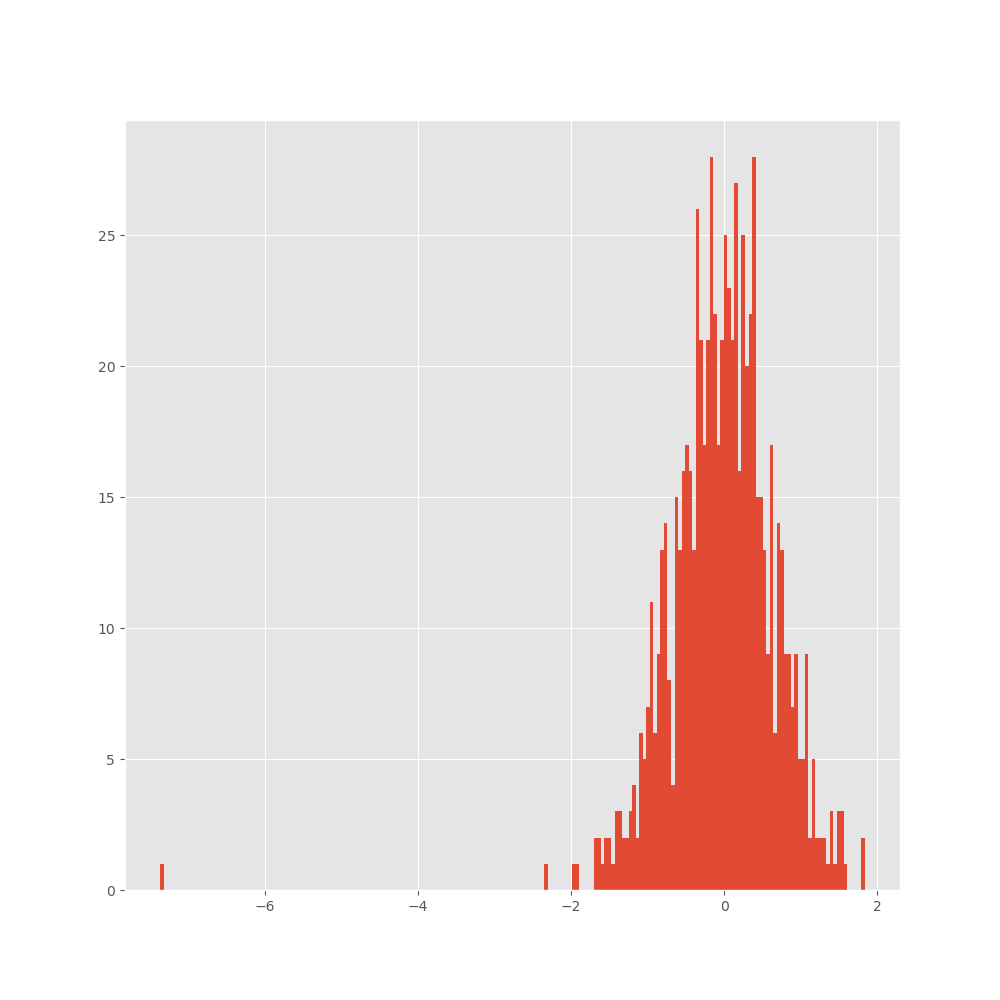

In [307]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0
print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0
print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0
print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))


token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [326]:

doc=abs_clean_text[5]
def keywordextract(sentence):
    text = sentence
    tkns = blueBERT_tokenizer.tokenize(text)
    print(tkns)
    indexed_tokens = blueBERT_tokenizer.convert_tokens_to_ids(tkns)
    
    segments_ids = [0] * len(tkns)
    tokens_tensor = torch.tensor([indexed_tokens]).to(device)
    segments_tensors = torch.tensor([segments_ids]).to(device)
    model.eval()
    prediction = []
    logit = model(tokens_tensor, token_type_ids=None,attention_mask=segments_tensors)[0]

    logit = logit.detach().cpu().numpy()
    prediction.extend([list(p) for p in np.argmax(logit, axis=2)])
    for k, j in enumerate(prediction[0]):
        if j==1 or j==0:
            print(blueBERT_tokenizer.convert_ids_to_tokens(tokens_tensor[0].to('cpu').numpy())[k], j)
            
print(doc)
keywordextract(doc)

A cleaner includes: a suction motor that generates suction force; a dust separation unit disposed under the suction motor and separates dust from air; a handle disposed behind the suction motor; and a battery disposed under the handle and behind the dust separation unit to supply power to the suction motor. 
['a', 'cleaner', 'includes', ':', 'a', 'su', '##ction', 'motor', 'that', 'generates', 'su', '##ction', 'force', ';', 'a', 'dust', 'separation', 'unit', 'disposed', 'under', 'the', 'su', '##ction', 'motor', 'and', 'separates', 'dust', 'from', 'air', ';', 'a', 'handle', 'disposed', 'behind', 'the', 'su', '##ction', 'motor', ';', 'and', 'a', 'battery', 'disposed', 'under', 'the', 'handle', 'and', 'behind', 'the', 'dust', 'separation', 'unit', 'to', 'supply', 'power', 'to', 'the', 'su', '##ction', 'motor', '.']
